In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
green_palette = sns.color_palette('YlGn')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
new_data = data[["playlist_genre", "track_popularity"]]
new_data.head()

,playlist_genre,track_popularity
0,pop,66
1,pop,67
2,pop,70
3,pop,60
4,pop,69


In [6]:
genres = new_data.groupby(["playlist_genre"], as_index=False).mean()
genres

,playlist_genre,track_popularity
0,edm,34.833526
1,latin,47.026576
2,pop,47.744870
3,r&b,41.223532
4,rap,43.215454
5,rock,41.728338


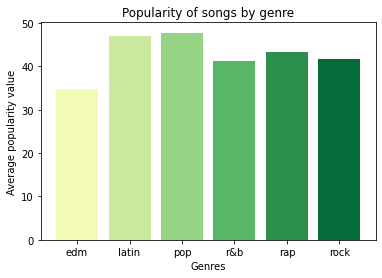

In [48]:
plt.bar(
    x=genres.playlist_genre,
    height=genres.track_popularity,
    color=green_palette
)
plt.title("Popularity of songs by genre")
plt.ylabel("Average popularity value")
plt.xlabel("Genres");

In [36]:
dur = data[["duration_ms", "track_popularity"]]
dur.head()

,duration_ms,track_popularity
0,194754,66
1,162600,67
2,176616,70
3,169093,60
4,189052,69


In [37]:
dur2 = dur.groupby(["track_popularity"], as_index=False).mean()
dur2

,track_popularity,duration_ms
0,0,246834.345912
1,1,241067.779130
2,2,242852.945736
3,3,245041.685358
4,4,244876.362500
...,...,...
96,96,221714.000000
97,97,199364.545455
98,98,199578.222222
99,99,163636.000000


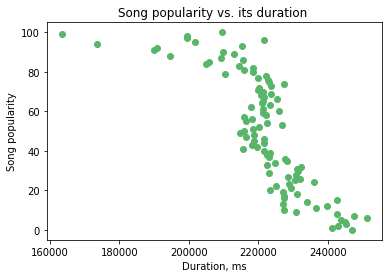

In [47]:
X = dur2.duration_ms
Y = dur2.track_popularity

plt.scatter(X, Y, color=green_palette[3])
plt.title("Song popularity vs. its duration ")
plt.ylabel("Song popularity")
plt.xlabel("Duration, ms")
plt.show()

In [11]:
data1 = data[["key", "mode", "track_popularity"]]
data1.head()

,key,mode,track_popularity
0,6,1,66
1,11,1,67
2,1,0,70
3,7,1,60
4,1,1,69


In [12]:
mask = (data1["key"] == 0) & (data1["mode"] == 0)
data1[mask]

,key,mode,track_popularity
31,0,0,56
37,0,0,63
50,0,0,56
56,0,0,52
118,0,0,5
...,...,...,...
32714,0,0,38
32736,0,0,17
32759,0,0,67
32769,0,0,44


In [13]:
print(data1['key'].unique())

[ 6 11  1  7  8  5  4  2  0 10  9  3]


In [20]:
pairs = []
for i in range(12):
  for n in range(2):
    mask = (data1["key"] == i) & (data1["mode"] == n)
    pairs.append(data1[mask].track_popularity)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


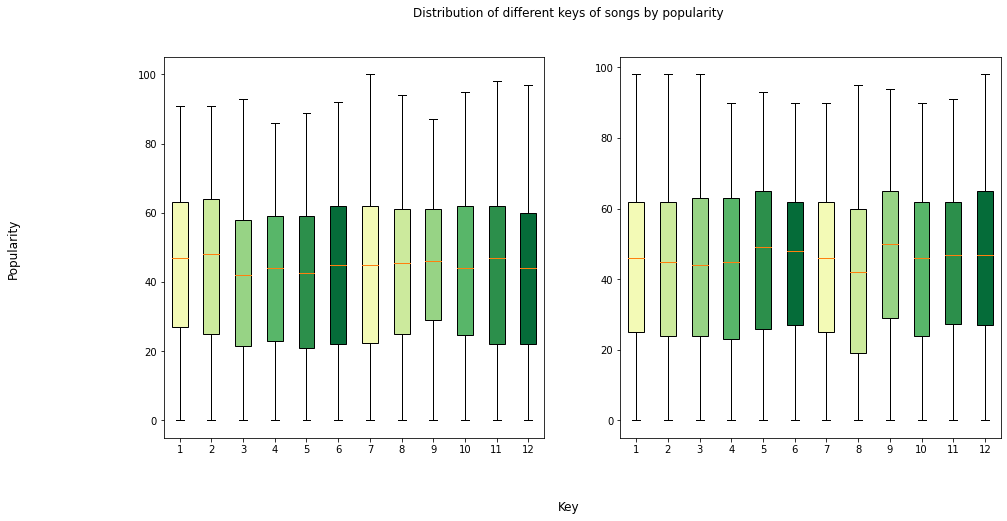

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Distribution of different keys of songs by popularity', fontsize=12)
fig.text(0.5, -0.02, 'Key', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Popularity', va='center', rotation='vertical', fontsize=12)

bplot1 = ax1.boxplot(pairs[:23:2], patch_artist=True)
bplot2 = ax2.boxplot(pairs[1:24:2], patch_artist=True)

colors = green_palette + green_palette + green_palette[:2]
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

In [10]:
data2 = data1.groupby(["key", "mode"], as_index=False).agg({"track_popularity": "median"})
data2

,key,mode,track_popularity
0,0,0,47.0
1,0,1,46.0
2,1,0,48.0
3,1,1,45.0
4,2,0,42.0
5,2,1,44.0
6,3,0,44.0
7,3,1,45.0
8,4,0,42.5
9,4,1,49.0


In [11]:
data2 = data2.pivot_table(index="key", columns="mode", values="track_popularity")
data2

mode,0,1
key,,
0,47.0,46.0
1,48.0,45.0
2,42.0,44.0
3,44.0,45.0
4,42.5,49.0
5,45.0,48.0
6,45.0,46.0
7,45.5,42.0
8,46.0,50.0


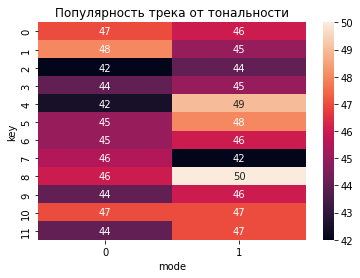

In [12]:
sns.heatmap(data2, annot=True)
plt.title("Популярность трека от тональности");